In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
data = pd.read_csv('spam.csv', encoding='latin1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [6]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

In [8]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])

In [11]:
print('v2열의 유니크한 값 :',data['v2'].nunique())

v2열의 유니크한 값 : 5169


In [12]:
data.drop_duplicates(subset=['v2'], inplace=True)

In [14]:
data.groupby('v1').count()

,v2
v1,
0,4516
1,653


In [15]:
X_data = data['v2']
y_data = data['v1']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, 
                                                    random_state=0, stratify=y_data)

In [35]:
tokenizer = Tokenizer()

In [36]:
# 코퍼스에 있는 텍스트 데이터로부터 토크나이저를 생성
tokenizer.fit_on_texts(X_train)

In [37]:
len(tokenizer.index_word) # 7821
tokenizer.word_counts

OrderedDict([('sorry', 101),
             ('i', 1832),
             ("can't", 47),
             ('help', 44),
             ('you', 1644),
             ('on', 404),
             ('this', 258),
             ('am', 171),
             ('in', 664),
             ('bus', 22),
             ('the', 1003),
             ('way', 75),
             ('to', 1679),
             ('calicut', 2),
             ('thanks', 65),
             ('again', 55),
             ('for', 525),
             ('your', 519),
             ('reply', 105),
             ('today', 108),
             ('when', 221),
             ('is', 643),
             ('ur', 256),
             ('visa', 1),
             ('coming', 41),
             ('and', 754),
             ('r', 113),
             ('u', 859),
             ('still', 125),
             ('buying', 5),
             ('gucci', 1),
             ('bags', 2),
             ('my', 551),
             ('sister', 13),
             ('things', 31),
             ('are', 383),
             ('no

In [38]:
X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_train_encoded

[[102, 1, 210, 230, 3, 17, 39],
 [1, 59, 8, 427, 17, 5, 137, 2, 2326],
 [157,
  180,
  12,
  13,
  98,
  93,
  47,
  9,
  40,
  3485,
  247,
  8,
  7,
  87,
  6,
  80,
  1312,
  5,
  3486,
  7,
  2327,
  11,
  660,
  306,
  20,
  25,
  467,
  708,
  1028,
  203,
  129,
  193,
  800,
  2328,
  23,
  1,
  144,
  71,
  2,
  111,
  78,
  43,
  2,
  130,
  11,
  800,
  186,
  122,
  1512],
 [1, 1154, 13, 104, 292],
 [222,
  622,
  857,
  540,
  623,
  22,
  23,
  83,
  10,
  47,
  6,
  257,
  32,
  6,
  26,
  64,
  936,
  407],
 [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3],
 [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112],
 [171, 16, 3, 522, 1155, 12, 104, 449],
 [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180],
 [709,
  223,
  115,
  1,
  390,
  2,
  89,
  3,
  25,
  2,
  89,
  10,
  13,
  1812,
  166,
  14,
  316,
  130,
  10,
  1313,
  24,
  63,
  3489,
  10,
  23,
  157,
  12,
  3490],
 [140,
  1,
  1156,
  4,
  710,
  15,
  566,
  17,
  1314,
  34

In [39]:
word_to_index = tokenizer.word_index
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'on': 17,
 'call': 18,
 'that': 19,
 'are': 20,
 '2': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'or': 27,
 "i'm": 28,
 'get': 29,
 'at': 30,
 'do': 31,
 'if': 32,
 'be': 33,
 'will': 34,
 'just': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 '4': 42,
 'how': 43,
 'gt': 44,
 'lt': 45,
 'go': 46,
 'when': 47,
 'from': 48,
 'what': 49,
 'ok': 50,
 'out': 51,
 'know': 52,
 'free': 53,
 'all': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'am': 59,
 'time': 60,
 'was': 61,
 'come': 62,
 'its': 63,
 'love': 64,
 'want': 65,
 'text': 66,
 'he': 67,
 'only': 68,
 'there': 69,
 'day': 70,
 'need': 71,
 'going': 72,
 'lor': 73,
 'send': 74,
 'one': 75,
 'as': 76,
 'home': 77,
 'about': 78,
 'back': 79,
 'still': 80,
 'k': 81,
 'see': 82,
 'txt': 83,
 'by': 84,
 'da'

In [40]:
tokenizer.word_counts.items()

odict_items([('sorry', 101), ('i', 1832), ("can't", 47), ('help', 44), ('you', 1644), ('on', 404), ('this', 258), ('am', 171), ('in', 664), ('bus', 22), ('the', 1003), ('way', 75), ('to', 1679), ('calicut', 2), ('thanks', 65), ('again', 55), ('for', 525), ('your', 519), ('reply', 105), ('today', 108), ('when', 221), ('is', 643), ('ur', 256), ('visa', 1), ('coming', 41), ('and', 754), ('r', 113), ('u', 859), ('still', 125), ('buying', 5), ('gucci', 1), ('bags', 2), ('my', 551), ('sister', 13), ('things', 31), ('are', 383), ('not', 336), ('easy', 20), ('uncle', 12), ('john', 7), ('also', 48), ('has', 79), ('his', 50), ('own', 10), ('bills', 2), ('so', 353), ('really', 71), ('need', 142), ('think', 93), ('about', 126), ('how', 235), ('make', 79), ('money', 52), ('later', 84), ('sha', 4), ('liked', 6), ('new', 100), ('house', 33), ('hello', 45), ('darlin', 14), ('ive', 9), ('finished', 17), ('college', 14), ('now', 360), ('txt', 119), ('me', 614), ('finish', 39), ('if', 297), ('can', 326),

In [41]:
total_cnt = len(word_to_index)
threshold = 2

In [42]:
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

In [43]:
for key, value in tokenizer.word_counts.items() :
    total_freq = total_freq + value
    if value < threshold :
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

In [46]:
total_freq # 654145
rare_cnt # 4337
rare_freq # 4337

4337

In [50]:
(rare_cnt / total_cnt)*100 
# 전체 단어 중에서 등장 빈도수가 1인 단어의 비율

55.45326684567191

In [49]:
(rare_freq / total_freq)*100 
# 전체 등장 빈도수에서 등장 빈도수가 1인 단어의 등장 비율

6.65745644331875

In [51]:
tokenizer_over2 = Tokenizer(num_words=total_cnt - rare_cnt +1 )

In [52]:
tokenizer_over2.fit_on_texts(X_train)

In [53]:
len(tokenizer_over2.index_word)

7821

In [54]:
sentences = [
    'I love my dog',
    'I, love my cat',
    'You love my dog!'
]

tokenizer3 = Tokenizer(num_words=4)

In [55]:
tokenizer3.fit_on_texts(sentences)
word_index = tokenizer3.word_index
word_index

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}

In [56]:
seq = tokenizer3.texts_to_sequences(sentences)
print(word_index)  # {'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}
print(seq)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}
[[3, 1, 2], [3, 1, 2], [1, 2]]


In [57]:
X_train_encoded

[[102, 1, 210, 230, 3, 17, 39],
 [1, 59, 8, 427, 17, 5, 137, 2, 2326],
 [157,
  180,
  12,
  13,
  98,
  93,
  47,
  9,
  40,
  3485,
  247,
  8,
  7,
  87,
  6,
  80,
  1312,
  5,
  3486,
  7,
  2327,
  11,
  660,
  306,
  20,
  25,
  467,
  708,
  1028,
  203,
  129,
  193,
  800,
  2328,
  23,
  1,
  144,
  71,
  2,
  111,
  78,
  43,
  2,
  130,
  11,
  800,
  186,
  122,
  1512],
 [1, 1154, 13, 104, 292],
 [222,
  622,
  857,
  540,
  623,
  22,
  23,
  83,
  10,
  47,
  6,
  257,
  32,
  6,
  26,
  64,
  936,
  407],
 [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3],
 [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112],
 [171, 16, 3, 522, 1155, 12, 104, 449],
 [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180],
 [709,
  223,
  115,
  1,
  390,
  2,
  89,
  3,
  25,
  2,
  89,
  10,
  13,
  1812,
  166,
  14,
  316,
  130,
  10,
  1313,
  24,
  63,
  3489,
  10,
  23,
  157,
  12,
  3490],
 [140,
  1,
  1156,
  4,
  710,
  15,
  566,
  17,
  1314,
  34

In [59]:
print('메일의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))

메일의 최대 길이 : 189
메일의 평균 길이 : 15.754534


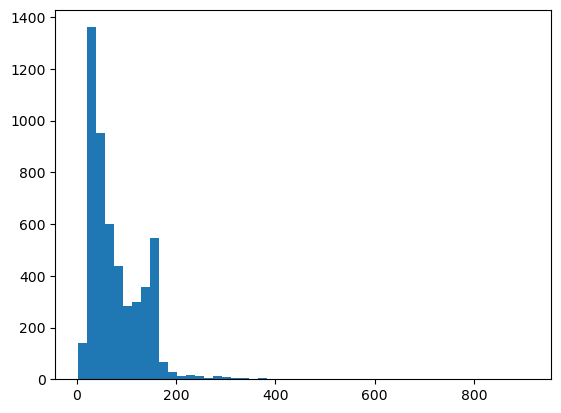

In [61]:
plt.hist([len(sample) for sample in X_data],bins= 50)
plt.show()

In [63]:
X_train_padded = pad_sequences(X_train_encoded,maxlen=189)
X_train_padded.shape

(4135, 189)

In [64]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

In [67]:
vocab_size = len(word_to_index) + 1 # 패딩 토큰 0번이 사용되므로 1을 더함

In [68]:
X_train_padded[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [70]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim)) # 7822차원 -> 32차원
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation = 'sigmoid'))

In [71]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 [==============================] - 2s 25ms/step - loss: 0.4907 - acc: 0.7642 - val_loss: 0.3951 - val_acc: 0.8779
Epoch 2/4
52/52 [==============================] - 1s 20ms/step - loss: 0.2733 - acc: 0.9199 - val_loss: 0.2508 - val_acc: 0.8936
Epoch 3/4
52/52 [==============================] - 1s 20ms/step - loss: 0.1001 - acc: 0.9746 - val_loss: 0.1093 - val_acc: 0.9686
Epoch 4/4
52/52 [==============================] - 1s 20ms/step - loss: 0.0498 - acc: 0.9870 - val_loss: 0.0764 - val_acc: 0.9770


In [72]:
X_test

4183    I just really need shit before tomorrow and I ...
108     I know! Grumpy old people. My mom was like you...
5237    Someonone you know is trying to contact you vi...
1858                     Sir, i am waiting for your call.
3603            Hey morning what you come to ask:-) pa...
                              ...                        
2086                  Dude how do you like the buff wind.
5548                   No, I was trying it all weekend ;V
2254                              Ok. Me watching tv too.
3593    Do you want a New Nokia 3510i Colour Phone Del...
1174    Yay! You better not have told that to 5 other ...
Name: v2, Length: 1034, dtype: object

In [82]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = 189)

In [83]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 [==============================] - 0s 5ms/step - loss: 0.0725 - acc: 0.9787

 테스트 정확도: 0.9787


In [77]:
model.predict(X_test_encoded)

33/33 [==============================] - 0s 5ms/step


array([[0.01463807],
       [0.01174466],
       [0.983055  ],
       ...,
       [0.00509432],
       [0.986912  ],
       [0.00954873]], dtype=float32)

In [85]:
590-390

200

In [86]:
260*3

780

### 모델에 대한 정성적 평가
### XAI = eXplainabel AI
* 스팸 / 햄 메일 분류기 자동화
> 데이터 수집 -> 전처리 -> 분석 -> 시각화 -> 모델링 -> 배포 -> 성능개선
* 기존 모델에 새롭게 수집된 데이터를 추가하여 학습


In [87]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from konlpy.tag import Okt

In [88]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x231fed82fd0>)

In [89]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
total_data

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [91]:
np.select([total_data.ratings > 3], [1])

array([1, 0, 1, ..., 1, 1, 1])

In [95]:
x = np.arange(10)
np.select([x<3, x>7],[x**2,x**3],default=999)

array([  0,   1,   4, 999, 999, 999, 999, 999, 512, 729])

In [96]:
total_data['label']=np.select([total_data.ratings>3], [1], default=0)
total_data

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...,...
199995,2,장마라그런가!!! 달지않아요,0
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,1
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,1
199998,5,넘이쁘고 쎄련되보이네요~,1


In [98]:
total_data['ratings'].nunique()
total_data['ratings'].value_counts()

5    81177
2    63989
1    36048
4    18786
Name: ratings, dtype: int64

In [99]:
total_data['reviews'].nunique()

199908

In [100]:
total_data.drop_duplicates(subset=['reviews'], inplace = True)

In [101]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)

In [102]:
train_data['label'].value_counts()

1    75013
0    74918
Name: label, dtype: int64

In [103]:
train_data['reviews']

59666     사이즈를 3센치씩 늘린건데도 작아요 그리고 색상은 완전 달라요 칙칙한핑크네요ㅠㅠ 많...
12433                        ㅂ불만족.. 빗이 아픔 .. 멍이피부에 빗질못해주겟네요
146516    이 제품쓰고 삼일만에 변기물이 잘 안내려갔어요. 혹시나해서 다시 빼보니 물이 다시 ...
158109                                           적당하고 만족합니다
70219                      편하자고 이용하는 밀키튼데 손 은근 많이 가서 저는 패쓰요
                                ...                        
119904    그냥그래요 ㄷㄷㄷㄷ ㅂㅂㅂㅂ 그냥그래요 ㄷㄷㄷㄷ ㅂㅂㅂㅂ ㅁㅁㅁㅁ ㅋㅋㅋㅋ ㅌㅌㅌㅌ...
103714    비싸요 진짜 별거 아니게 허접하게 생겼는데 이게 이만원이라니 진짜 가방 구겨지는것만...
131960                               100장 주문 안됩니다 500장 가능해요
146908    . 하림치킨 여기서 구입하니 엄청 저렴하네요 배송도 쾅꽝 얼어서 도착하고 아주 만족...
121984                                 조금 약해보이는데 저렴하게 잘 삿어요
Name: reviews, Length: 149931, dtype: object

In [104]:
# 한글과 공백을 제외한 다른 문자 모두 제거

In [107]:
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [106]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
train_data['reviews'].replace('',np.nan , inplace = True)

In [111]:
train_data.isnull().sum()

ratings    0
reviews    0
label      0
dtype: int64

In [112]:
test_data.drop_duplicates(subset=['reviews'],inplace=True)
test_data['reviews'] = test_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
test_data['reviews'].replace('',np.nan,inplace=True)
test_data = test_data.dropna(how = 'any')

In [113]:
len(test_data)

49977

In [114]:
test_data

,ratings,reviews,label
193242,1,너무 낮고 솜도 적고 실망스럽습니다,0
125080,1,피부에 뾰루지가 많이 올라와요,0
122750,5,배송도 빠르네요 가격대비 좋은것 같아요 첨에는 힘들어하나 조금 지나니 잘 하네요,1
72927,5,재구매입니다 핏도 좋고 착용감도 좋습니다,1
83890,1,파손제품 온거 출장같다 오늘 받았는데 현재상황 장난하시는지 택배회사 항의하세요,0
...,...,...,...
42438,2,연결해서 쓰려고 단으로 개 주문했는데연결부위 맞추기가 넘 힘드네여 거기다 세로 조립...,0
65471,2,허리는 너무크고 종아리는 꽉 끼어서 약간불편해 하네요 아들이 그래도 따뜻하다며 잘입...,0
192593,5,샵에 가서 받았었는데 이거 구매하고 집에서 셀프로 하는데 넘나 좋으네요 세트로 사길...,1
47486,4,가격도 착하고 다좋은데 조금얇은감이있네요 넓이도 조금커서 살짝헐렁거리지만 그래도 만...,1


In [115]:
okt = Okt()

In [132]:
okt.pos('배송도 빠르네요 가격대비 좋은것 같아요 첨에는 힘들어하나 조금 지나니 잘 하네요')[0][1]

'Verb'

In [ ]:
train_data['reviews'].apply(lambda x: okt.pos(x))
test_data['reviews'].apply(lambda x: okt.pos(x))

In [142]:
test_data['NV'] = test_data['reviews'].apply(lambda x: ' '.join([word[0] for word in okt.pos(x) if word[1] in ['Noun', 'Verb']]))
train_data['NV'] = train_data['reviews'].apply(lambda x: ' '.join([word[0] for word in okt.pos(x) if word[1] in ['Noun', 'Verb']]))

In [169]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']
train_data['tokenized'] = train_data['reviews'].apply(okt.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [187]:
train_data1 = train_data
test_data1 = test_data

In [170]:
from collections import Counter

In [171]:
negative_words = np.hstack(train_data[train_data.label == 0 ]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [172]:
negative_word_count = Counter(negative_words)
negative_word_count.most_common(20)

[('너무', 13039),
 ('요', 11784),
 ('안', 11676),
 ('배송', 9171),
 ('그냥', 8518),
 ('잘', 7817),
 ('로', 5777),
 ('했는데', 5692),
 ('별로', 5549),
 ('못', 5174),
 ('제품', 5071),
 ('으로', 4999),
 ('생각', 4927),
 ('좀', 4878),
 ('사용', 4846),
 ('하고', 4769),
 ('ㅠㅠ', 4760),
 ('구매', 4634),
 ('보다', 4617),
 ('맛', 4017)]

In [173]:
positive_word_count = Counter(positive_words)
positive_word_count.most_common(20)

[('잘', 15302),
 ('좋아요', 14527),
 ('배송', 12251),
 ('너무', 9100),
 ('재구매', 8573),
 ('구매', 7186),
 ('요', 6639),
 ('사용', 5415),
 ('가격', 5015),
 ('으로', 4477),
 ('같아요', 4434),
 ('로', 4318),
 ('좋네요', 4221),
 ('빠르고', 4025),
 ('보다', 3955),
 ('제품', 3950),
 ('주문', 3815),
 ('입니다', 3769),
 ('생각', 3491),
 ('했어요', 3367)]

긍정 리뷰의 평균 길이 : 10.768613440337008
부정 리뷰의 평균 길이 : 14.101804639739449


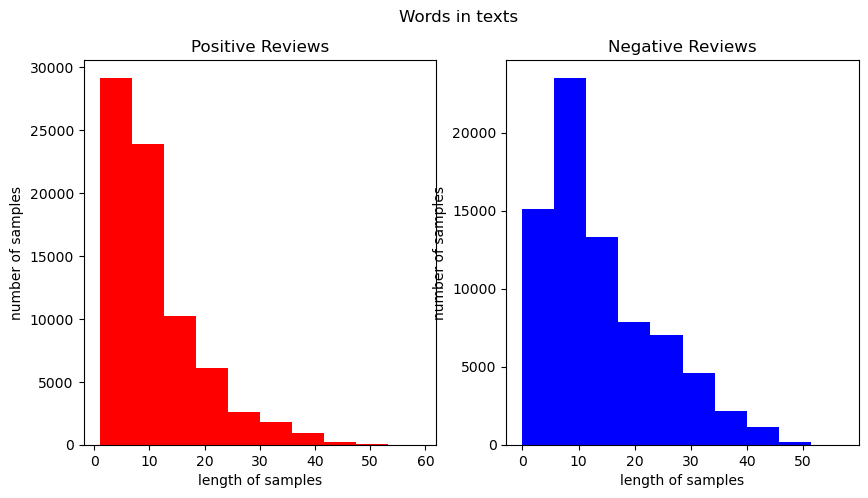

In [174]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [175]:
test_data['tokenized'] = test_data['reviews'].apply(okt.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [176]:
train_data

,ratings,reviews,label,NV,tokenized
59666,2,사이즈를 센치씩 늘린건데도 작아요 그리고 색상은 완전 달라요 칙칙한핑크네요ㅠㅠ 많이...,0,사이즈 센치 늘린건데 도 색상 완전 달라 핑크 막 효과,"[사이즈, 센치, 씩, 늘린건데, 작아요, 그리고, 색상, 완전, 달라, 요, 칙칙..."
12433,2,ㅂ불만족 빗이 아픔 멍이피부에 빗질못해주겟네요,0,불만족 빗 아픔 멍 피부 빗질못 해주겟네요,"[ㅂ, 불만족, 빗, 아픔, 멍, 피부, 빗질못, 해주겟네요]"
146516,1,이 제품쓰고 삼일만에 변기물이 잘 안내려갔어요 혹시나해서 다시 빼보니 물이 다시 잘...,0,이 제품 쓰고 삼일 변기 물이 잘 내려갔어요 혹시 해서 다시 빼 보니 물이 다시 잘...,"[제품, 쓰고, 삼일, 만에, 변기, 물이, 잘, 안, 내려갔어요, 혹시, 나, 해..."
158109,5,적당하고 만족합니다,1,,"[적당하고, 만족합니다]"
70219,2,편하자고 이용하는 밀키튼데 손 은근 많이 가서 저는 패쓰요,0,이용 하는 밀키 튼데 손 은근 가서 저 패쓰,"[편하자고, 이용, 하는, 밀키, 튼데, 손, 은근, 많이, 가서, 저, 패쓰, 요]"
...,...,...,...,...,...
119904,2,그냥그래요 ㄷㄷㄷㄷ ㅂㅂㅂㅂ 그냥그래요 ㄷㄷㄷㄷ ㅂㅂㅂㅂ ㅁㅁㅁㅁ ㅋㅋㅋㅋ ㅌㅌㅌㅌ...,0,그냥 그냥,"[그냥, 그래요, ㄷㄷㄷㄷ, ㅂㅂㅂㅂ, 그냥, 그래요, ㄷㄷㄷㄷ, ㅂㅂㅂㅂ, ㅁㅁㅁ..."
103714,2,비싸요 진짜 별거 아니게 허접하게 생겼는데 이게 이만원이라니 진짜 가방 구겨지는것만...,0,진짜 별거 허 접하게 생겼는데 이 이만원 진짜 가방 구겨지는것만 구매 했음,"[비싸요, 진짜, 별거, 아니게, 허, 접하게, 생겼는데, 이만원, 이라니, 진짜,..."
131960,2,장 주문 안됩니다 장 가능해요,0,장 주문 장,"[장, 주문, 안됩니다, 장, 가능해요]"
146908,5,하림치킨 여기서 구입하니 엄청 저렴하네요 배송도 쾅꽝 얼어서 도착하고 아주 만족합...,1,하림 치킨 여기 구입 하니 배송 쾅꽝 얼어서 도착 아주,"[하림, 치킨, 여기, 서, 구입, 하니, 엄청, 저렴하네요, 배송, 쾅꽝, 얼어서..."


In [177]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [178]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [179]:
tokenizer.word_index

{'잘': 1,
 '너무': 2,
 '배송': 3,
 '요': 4,
 '좋아요': 5,
 '안': 6,
 '재구매': 7,
 '구매': 8,
 '사용': 9,
 '로': 10,
 '으로': 11,
 '그냥': 12,
 '제품': 13,
 '했는데': 14,
 '가격': 15,
 '보다': 16,
 '생각': 17,
 '하고': 18,
 '같아요': 19,
 '좀': 20,
 '입니다': 21,
 '주문': 22,
 '맛': 23,
 '많이': 24,
 '더': 25,
 '못': 26,
 '때': 27,
 '해서': 28,
 '별로': 29,
 '만': 30,
 '것': 31,
 '사이즈': 32,
 'ㅠㅠ': 33,
 '포장': 34,
 '에서': 35,
 '개': 36,
 '서': 37,
 '합니다': 38,
 '거': 39,
 '상품': 40,
 '좋네요': 41,
 'ㅠ': 42,
 '빠르고': 43,
 '했어요': 44,
 '정말': 45,
 '다른': 46,
 '냄새': 47,
 '부분': 48,
 '제': 49,
 '이라': 50,
 '나': 51,
 '인데': 52,
 'ㅎㅎ': 53,
 '하나': 54,
 '넘': 55,
 '두': 56,
 '아주': 57,
 '진짜': 58,
 '좋습니다': 59,
 '샀는데': 60,
 '저': 61,
 '할': 62,
 '좋은': 63,
 '만족합니다': 64,
 '또': 65,
 '조금': 66,
 '구입': 67,
 '반품': 68,
 'ㅜㅜ': 69,
 '딱': 70,
 '아이': 71,
 '정도': 72,
 '해': 73,
 '맘': 74,
 '느낌': 75,
 '아직': 76,
 '완전': 77,
 '중': 78,
 '좋고': 79,
 '감사합니다': 80,
 '엄청': 81,
 '용': 82,
 '처음': 83,
 '면': 84,
 '있어요': 85,
 '일': 86,
 '비': 87,
 '사진': 88,
 '않고': 89,
 '디자인': 90,
 '효과': 91,
 '라': 92,
 '그': 9

In [180]:
threshold = 2
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 94361
등장 빈도가 1번 이하인 희귀 단어의 수: 52344
단어 집합에서 희귀 단어의 비율: 55.47207002893144
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.807755335212537


In [181]:
vocab_size = total_cnt - rare_cnt + 2  # 2 = 0 패딩 토큰, OOV(Out Of Vocabulary) 토큰
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 42019


In [182]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
# 토큰화 과정에서 사전에 해당되는 단어는 'OOV'로 표현(oov_token = 'OOV')

In [183]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [184]:
print(tokenizer.word_index)

{'OOV': 1, '잘': 2, '너무': 3, '배송': 4, '요': 5, '좋아요': 6, '안': 7, '재구매': 8, '구매': 9, '사용': 10, '로': 11, '으로': 12, '그냥': 13, '제품': 14, '했는데': 15, '가격': 16, '보다': 17, '생각': 18, '하고': 19, '같아요': 20, '좀': 21, '입니다': 22, '주문': 23, '맛': 24, '많이': 25, '더': 26, '못': 27, '때': 28, '해서': 29, '별로': 30, '만': 31, '것': 32, '사이즈': 33, 'ㅠㅠ': 34, '포장': 35, '에서': 36, '개': 37, '서': 38, '합니다': 39, '거': 40, '상품': 41, '좋네요': 42, 'ㅠ': 43, '빠르고': 44, '했어요': 45, '정말': 46, '다른': 47, '냄새': 48, '부분': 49, '제': 50, '이라': 51, '나': 52, '인데': 53, 'ㅎㅎ': 54, '하나': 55, '넘': 56, '두': 57, '아주': 58, '진짜': 59, '좋습니다': 60, '샀는데': 61, '저': 62, '할': 63, '좋은': 64, '만족합니다': 65, '또': 66, '조금': 67, '구입': 68, '반품': 69, 'ㅜㅜ': 70, '딱': 71, '아이': 72, '정도': 73, '해': 74, '맘': 75, '느낌': 76, '아직': 77, '완전': 78, '중': 79, '좋고': 80, '감사합니다': 81, '엄청': 82, '용': 83, '처음': 84, '면': 85, '있어요': 86, '일': 87, '비': 88, '사진': 89, '않고': 90, '디자인': 91, '효과': 92, '라': 93, '그': 94, '보고': 95, '대비': 96, '상태': 97, '선물': 98, '구': 99, '다시': 100, '추천': 101, '써': 10

리뷰의 최대 길이 : 59
리뷰의 평균 길이 : 12.43415304373345


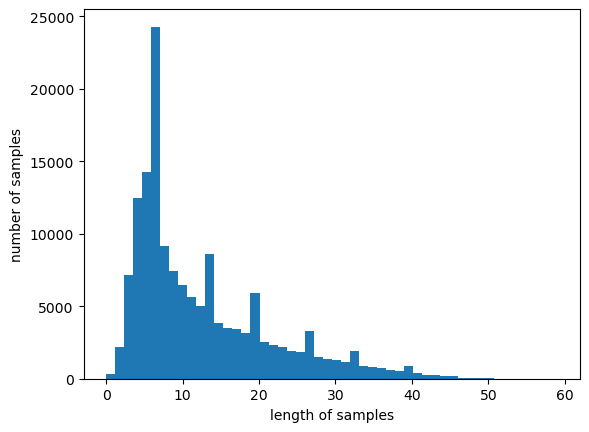

In [185]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [186]:
X_train = pad_sequences(X_train, maxlen = 59)
X_test = pad_sequences(X_test, maxlen = 59)

In [188]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [189]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [190]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [191]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
2000/2000 [==============================] - ETA: 0s - loss: 0.3010 - acc: 0.8804
Epoch 1: val_acc improved from -inf to 0.90749, saving model to best_model.h5
2000/2000 [==============================] - 112s 55ms/step - loss: 0.3010 - acc: 0.8804 - val_loss: 0.2501 - val_acc: 0.9075
Epoch 2/15
1999/2000 [============================>.] - ETA: 0s - loss: 0.2353 - acc: 0.9158
Epoch 2: val_acc did not improve from 0.90749
2000/2000 [==============================] - 114s 57ms/step - loss: 0.2353 - acc: 0.9158 - val_loss: 0.2630 - val_acc: 0.8995
Epoch 3/15
1999/2000 [============================>.] - ETA: 0s - loss: 0.2116 - acc: 0.9256
Epoch 3: val_acc improved from 0.90749 to 0.91099, saving model to best_model.h5
2000/2000 [==============================] - 113s 57ms/step - loss: 0.2116 - acc: 0.9256 - val_loss: 0.2496 - val_acc: 0.9110
Epoch 4/15
1999/2000 [============================>.] - ETA: 0s - loss: 0.1937 - acc: 0.9331
Epoch 4: val_acc improved from 0.91099 to 0.9

In [192]:
loaded_model = load_model('best_model.h5')
loaded_model.evaluate(X_test,y_test)[1]

1562/1562 [==============================] - 23s 15ms/step - loss: 0.2361 - acc: 0.9143


0.9142605662345886

In [216]:
def predict_sentiment(review, model, tokenizer):

    tokenized = tokenizer.texts_to_sequences([review])
    padded = pad_sequences(tokenized, maxlen=59)

    prediction = model.predict(padded)

    sentiment_score = prediction[0][0]
    if sentiment_score >= 0.5:
        print("긍정 리뷰", sentiment_score)
    else:
        print("부정 리뷰",  sentiment_score)

user_review = input('리뷰를 남겨 주세요 : ')
predict_sentiment(user_review, model, tokenizer)


리뷰를 남겨 주세요 : 너무 좋아요
1/1 [==============================] - 0s 22ms/step
긍정 리뷰 0.9034455
